# Figure 4B Primacy of largest inputs to the oviINr
We wanted to see here wether the largest inputs were mainly in one module or if there was some pattern to the primacy of the largest inputs within their modules.

This was done by finding the rank of ovis to the Input celltypes (was oviIN their highest output)

Written by Rhessa Weber Langstaff

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuprint import Client
import matplotlib.patheffects as path_effects
import matplotlib as mpl
import bokeh
import bokeh.palettes

from neuprint import fetch_simple_connections, fetch_synapse_connections, NeuronCriteria as NC

auth_token_file = open("flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + 'v1.2.1', token=auth_token)
except:
    np_client = None


# Body Ids of oviINs
oviINr= 423101189
oviINl= 485934965
# inputs to the oviINr
ovi_inputs = fetch_simple_connections(None, oviINr)
ovi_inputs


,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
0,611015907,423101189,287,SMP176,oviIN,SMP176_R,oviIN_R,"{'INP': {'pre': 54, 'post': 53}, 'CRE(R)': {'p..."
1,5813087891,423101189,255,SMP544,oviIN,SMP544_R,oviIN_R,"{'LX(R)': {'pre': 66, 'post': 65}, 'LAL(R)': {..."
2,1598011458,423101189,243,LAL134,oviIN,LAL134_R,oviIN_R,"{'LX(R)': {'pre': 42, 'post': 42}, 'LAL(R)': {..."
3,5813022375,423101189,236,IB017,oviIN,IB017_R,oviIN_R,"{'SNP(R)': {'pre': 97, 'post': 97}, 'SMP(R)': ..."
4,448342846,423101189,225,CRE075,oviIN,CRE075_R,oviIN_R,"{'INP': {'pre': 199, 'post': 199}, 'CRE(R)': {..."
...,...,...,...,...,...,...,...,...
2519,5901221890,423101189,1,SLP422,oviIN,SLP422_R,oviIN_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."
2520,5901226036,423101189,1,None,oviIN,None,oviIN_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."
2521,5901230025,423101189,1,None,oviIN,None,oviIN_R,"{'VMNP': {'pre': 1, 'post': 1}, 'VES(R)': {'pr..."
2522,5901231318,423101189,1,None,oviIN,None,oviIN_R,"{'SNP(L)': {'pre': 1, 'post': 1}, 'SMP(L)': {'..."


In [2]:
# import modularity data
mod = pd.read_csv('oviIN/preprocessed_inputs-v1.2.1/preprocessed_nodes.csv')
mod

,id,key,0.0,0.05,0.1,0.5,0.75,1.0,instance,celltype,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,1003215282,1,1,1,1,1,1,1,CL229_R,CL229,...,Traced,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
1,1005952640,2,2,1,1,2,2,2,IB058_R,IB058,...,Traced,False,Roughly traced,PVL20,NaN,NaN,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S..."
2,1006928515,3,1,1,1,3,3,3,CL300_R,CL300,...,Traced,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
3,1007260806,4,2,1,1,4,4,4,CL301_R,CL301,...,Traced,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",NaN,"['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S..."
4,1008024276,5,3,2,2,5,5,5,FB5N_R,FB5N,...,Traced,False,Roughly traced,AVM08,472.5,"[19178, 29711, 37312]","{'SNP(L)': {'post': 5, 'upstream': 5, 'mito': ...",SMPCREFB5_4,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,987273073,2507,3,8,8,409,604,629,(PVL05)_L,NaN,...,Traced,False,Roughly traced,NaN,NaN,NaN,"{'SNP(R)': {'pre': 65, 'post': 52, 'downstream...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'..."
2507,987842109,2508,3,9,23,533,780,815,NaN,NaN,...,Orphan,NaN,Orphan hotknife,NaN,NaN,NaN,"{'SNP(R)': {'pre': 2, 'post': 13, 'downstream'...",NaN,"['SMP(R)', 'SNP(R)']","['SMP(R)', 'SNP(R)']"
2508,988567837,2509,2,3,4,16,58,63,FB4G_R,FB4G,...,Traced,False,Roughly traced,AVM08,NaN,NaN,"{'SNP(R)': {'pre': 6, 'post': 73, 'downstream'...",CRELALFB4_3,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F..."
2509,988909130,2510,2,3,4,389,559,572,FB5V_R,FB5V,...,Traced,False,Roughly traced,AVM10,296.5,"[13226, 32024, 18600]","{'SNP(R)': {'pre': 1, 'post': 28, 'downstream'...",CRELALFB5,"['AB(R)', 'CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX',...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F..."


In [3]:
# filter for cluster 4
cluster4 = mod[mod['0.0'] == 4]
cluster4

,id,key,0.0,0.05,0.1,0.5,0.75,1.0,instance,celltype,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
42,1018009357,43,4,4,9,24,28,31,(PVL05)_L,NaN,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 29, 'post': 28, 'downstream...",NaN,"['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'MB(L)', 'SM...","['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'SMP(L)', 'S..."
80,1048289014,81,4,15,11,43,47,54,(MBDLaxon1),NaN,...,Traced,False,Roughly traced,NaN,NaN,NaN,"{'SNP(L)': {'pre': 35, 'post': 31, 'downstream...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'..."
179,1143807196,180,4,15,11,80,100,107,NaN,NaN,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 526, 'post': 547, 'downstre...",NaN,"['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'IB', 'IC...","['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'IB', 'IC..."
204,1193258702,205,4,1,21,62,113,120,NaN,NaN,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'post': 6, 'upstream': 6}, 'SMP(L)...",NaN,"['ATL(L)', 'ATL(R)', 'IB', 'INP', 'SMP(L)', 'S...","['ATL(L)', 'ATL(R)', 'IB', 'INP']"
280,1378440243,281,4,1,1,116,147,157,NaN,NaN,...,Traced,True,Leaves,NaN,NaN,NaN,"{'INP': {'pre': 251, 'post': 92, 'downstream':...",NaN,"['ATL(L)', 'IB', 'INP', 'SPS(L)', 'SPS(R)', 'V...","['ATL(L)', 'IB', 'INP', 'SPS(L)', 'SPS(R)', 'V..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,926584037,2424,4,15,69,524,766,810,NaN,NaN,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 46, 'post': 21, 'downstream...",NaN,"['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'SMP(L)', 'S...","['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'SMP(L)', 'S..."
2425,945354221,2426,4,15,11,92,155,162,IB022(PDM09)_L,IB022,...,Traced,False,Roughly traced,NaN,326.0,"[30938, 13721, 16120]","{'SNP(L)': {'pre': 116, 'post': 64, 'downstrea...",NaN,"['GOR(L)', 'IB', 'ICL(L)', 'INP', 'SMP(L)', 'S...","['GOR(L)', 'IB', 'ICL(L)', 'INP', 'SMP(L)', 'S..."
2473,978056035,2474,4,15,11,491,738,633,IB022(PDM09)_L,IB022,...,Traced,False,Roughly traced,NaN,326.0,"[31925, 14118, 16648]","{'SNP(L)': {'pre': 125, 'post': 204, 'downstre...",NaN,"['ATL(L)', 'GOR(L)', 'IB', 'ICL(L)', 'INP', 'S...","['ATL(L)', 'GOR(L)', 'IB', 'ICL(L)', 'INP', 'S..."
2474,978068779,2475,4,15,11,323,708,751,NaN,NaN,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 154, 'post': 137, 'downstre...",NaN,"['ATL(L)', 'ATL(R)', 'IB', 'INP', 'SIP(L)', 'S...","['ATL(L)', 'ATL(R)', 'IB', 'ICL(L)', 'INP', 'S..."


In [4]:
# drop everything but the modularity data
mod = mod[['id','0.0', '0.05', '0.1', '0.5', '0.75', '1.0', 'celltype']]
mod

,id,0.0,0.05,0.1,0.5,0.75,1.0,celltype
0,1003215282,1,1,1,1,1,1,CL229
1,1005952640,2,1,1,2,2,2,IB058
2,1006928515,1,1,1,3,3,3,CL300
3,1007260806,2,1,1,4,4,4,CL301
4,1008024276,3,2,2,5,5,5,FB5N
...,...,...,...,...,...,...,...,...
2506,987273073,3,8,8,409,604,629,NaN
2507,987842109,3,9,23,533,780,815,NaN
2508,988567837,2,3,4,16,58,63,FB4G
2509,988909130,2,3,4,389,559,572,FB5V


### Notes
Here I am noting where the celltypes that usually fall into cluster 4 additionally fall into: \
SMP052: cluster 1 \
SMP544: cluster 2 \
SMP311: cluster 5  \
pc1d: cluster 2  \
SMP175: cluster 5

In [5]:
# Only use neccessary columns and collapse by celltype in ascending order and the number in column '0.0 (drops None Here)
# if you want to keep None, use 'None" string intead 
ovi_inputs_new = ovi_inputs[['type_pre', 'weight']].groupby('type_pre',as_index=False).sum().sort_values(by='weight', ascending=False, ignore_index=True)
# Filter out the cells with less than 100 synapses
ovi_inputs_col = ovi_inputs_new[ovi_inputs_new['weight'] >= 100]
ovi_inputs_col

,type_pre,weight
0,FS1A,892
1,IB017,370
2,SMP052,361
3,SMP176,299
4,FC2B,290
5,SMP383,281
6,SMP544,259
7,LAL134,247
8,SMP550,234
9,CRE075,225


In [6]:
# merge the 0.0 modularity data onto the ovi_inputs
ovi_inputs_merged = ovi_inputs_col.merge(mod, left_on='type_pre', right_on = 'celltype', how='left')
ovi_inputs_merged

,type_pre,weight,id,0.0,0.05,0.1,0.5,0.75,1.0,celltype
0,FS1A,892,1014102651,3,2,2,5,5,20,FS1A
1,FS1A,892,1014223948,3,2,2,5,5,20,FS1A
2,FS1A,892,1014461486,3,2,2,5,5,20,FS1A
3,FS1A,892,1014465452,3,2,2,5,5,10,FS1A
4,FS1A,892,1014465588,3,2,2,5,5,23,FS1A
...,...,...,...,...,...,...,...,...,...,...
140,SMP175,103,5813055949,5,5,20,249,339,368,SMP175
141,SMP556,102,579536041,2,1,6,178,515,515,SMP556
142,SMP556,102,798939240,2,3,4,106,500,601,SMP556
143,SMP311,102,5813041161,4,15,11,276,443,462,SMP311


In [7]:
# drop all the columns that are not needed
ovi_inputs_filtered = ovi_inputs_merged[['type_pre', 'weight', '0.0']]
ovi_inputs_filtered

,type_pre,weight,0.0
0,FS1A,892,3
1,FS1A,892,3
2,FS1A,892,3
3,FS1A,892,3
4,FS1A,892,3
...,...,...,...
140,SMP175,103,5
141,SMP556,102,2
142,SMP556,102,2
143,SMP311,102,4


In [8]:
# Collapse the data by type pre without summing weights
ovi_inputs_grouped = ovi_inputs_filtered.groupby('type_pre', as_index=False).first()

# Edit cluster 4 instances
ovi_inputs_grouped.loc[ovi_inputs_grouped['type_pre'] == 'SMP175', '0.0'] = 5
ovi_inputs_grouped.loc[ovi_inputs_grouped['type_pre'] == 'SMP311', '0.0'] = 5
ovi_inputs_grouped.loc[ovi_inputs_grouped['type_pre'] == 'pC1d', '0.0'] = 2
ovi_inputs_grouped.loc[ovi_inputs_grouped['type_pre'] == 'SMP544', '0.0'] = 2
ovi_inputs_grouped.loc[ovi_inputs_grouped['type_pre'] == 'SMP052', '0.0'] = 1

# Order by module in 0.0 column
ovi_inputs_final = ovi_inputs_grouped.sort_values(by='0.0', ascending=True, ignore_index=True)
ovi_inputs_final

,type_pre,weight,0.0
0,SMP176,299,1
1,SMP566,203,1
2,SMP520,125,1
3,SMP383,281,1
4,SMP314,106,1
5,SMP237,163,1
6,SMP052,361,1
7,SMP051,157,1
8,VES047,118,2
9,SMP556,102,2


In [9]:
ovi_inputs_use = ovi_inputs_final.copy()
# Process to fetch connections for each celltype and find out where oviIN ranks in each celltype's outputs
testchunk = ovi_inputs_use.copy()  # Copies dataframe to avoid SettingWithCopyWarning

# Add columns to testchunk
testchunk['out_to_ovis_weight'] = 0
testchunk['out_to_ovis_rank'] = 0

In [10]:
# iterate through each row in testchunk and fetch connections for each cell type in order to find out where oviIN ranks with each cell's outputs
for idx, row in testchunk.iterrows():
    # fetch outputs for each top input of oviIN
    i_outputs = fetch_simple_connections(row.type_pre,None)

    # grab only necessary columns
    i_outputs = i_outputs[['type_post','weight']]

    # collapse outputs by cell type, summing along weights, and sort in descending order
    i_outputs = i_outputs.groupby('type_post', as_index=False).sum().sort_values(by='weight', ascending=False,ignore_index=True)

    # grab the row where oviIN is. there will be 1 row for both oviINr and oviINl.
    thing = i_outputs[i_outputs['type_post'] == 'oviIN'].weight

    # add the weight and rank of oviIN in its partners outputs to the testchunk dataframe
    testchunk.loc[idx,'out_to_ovis_weight'] = thing.values[0]
    testchunk.loc[idx,'out_to_ovis_rank'] = thing.index.values[0]

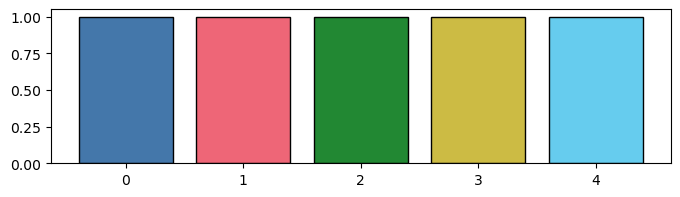

In [11]:
# Setting colors that coincide with module theme
colors = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE']

# Plotting the colors
plt.figure(figsize=(8,2))
for i, color in enumerate(colors):
    plt.bar(i, 1, color=color, edgecolor='black')

In [12]:
# Assign colors to each module
testchunk['color'] = testchunk['0.0'].apply(lambda x: colors[x-1])

testchunk

,type_pre,weight,0.0,out_to_ovis_weight,out_to_ovis_rank,color
0,SMP176,299,1,544,2,#4477AA
1,SMP566,203,1,242,0,#4477AA
2,SMP520,125,1,258,0,#4477AA
3,SMP383,281,1,543,1,#4477AA
4,SMP314,106,1,131,2,#4477AA
5,SMP237,163,1,337,0,#4477AA
6,SMP052,361,1,614,0,#4477AA
7,SMP051,157,1,273,0,#4477AA
8,VES047,118,2,118,0,#EE6677
9,SMP556,102,2,117,6,#EE6677


In [13]:
# Sorting 
testchunk_edit = testchunk.sort_values(by='0.0', ascending=True, ignore_index=True)

# Testchunk drop columns
testchunk_small = testchunk_edit[['type_pre', 'out_to_ovis_rank', 'color']]

# Pivot so that celltypes in the index, and oviIN ranks in the columns and 0.0 is a second level column
testchunk_pivot = testchunk_small.pivot(index='out_to_ovis_rank', columns=['type_pre', 'color'], values='out_to_ovis_rank')

# Replace any non-Nan values with the number 1
testchunk_pivot = testchunk_pivot.notnull().astype('int')

# replace any zeros with NaN
testchunk_pivot = testchunk_pivot.replace(0, np.nan)

# Add in a blank row after 7 for plotting purposes
testchunk_pivot.loc[10]= np.nan

# Sort the index
testchunk_pivot = testchunk_pivot.sort_index(ascending=True)

testchunk_pivot

type_pre,SMP176,SMP566,SMP520,SMP383,SMP314,SMP237,SMP052,SMP051,LAL134,IB017,...,SMP386,FS1A,FC2C,FC2B,SMP112,SMP175,SMP042,SMP550,SMP551,SMP311
color,#4477AA,#4477AA,#4477AA,#4477AA,#4477AA,#4477AA,#4477AA,#4477AA,#EE6677,#EE6677,...,#228833,#228833,#228833,#228833,#228833,#66CCEE,#66CCEE,#66CCEE,#66CCEE,#66CCEE
out_to_ovis_rank,,,,,,,,,,,,,,,,,,,,,
0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/db/q8_kwk2x73df8d997nrf14k1nfx1_b/T/ipykernel_59156/4061978703.py:28: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles[33:], labels_final[-5:], loc='upper right', fontsize=16, title='Module Id', title_fontsize=16)
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


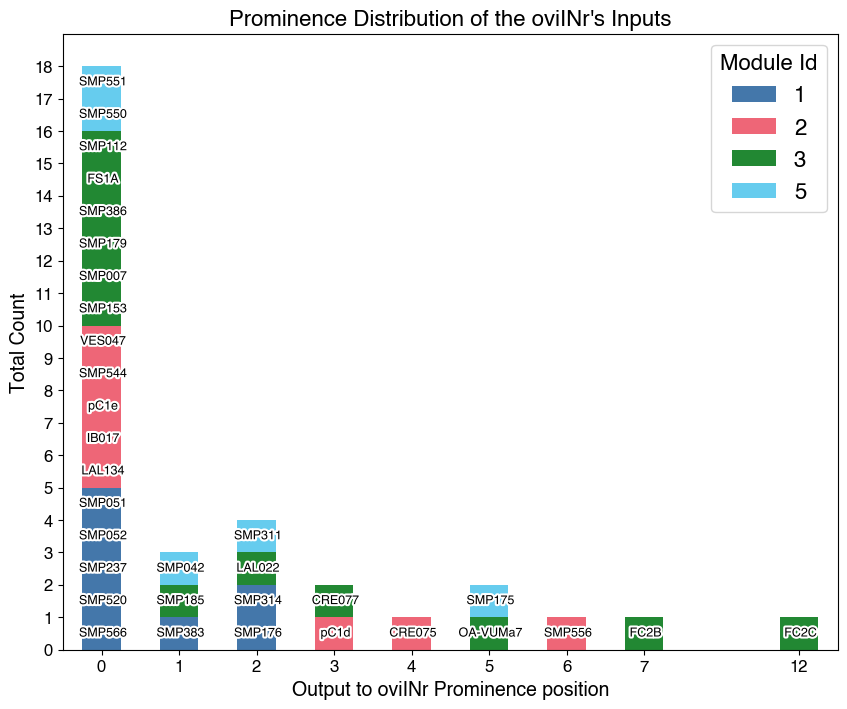

In [14]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 8))
# stacked bar plot using 0.0 index as color group
testchunk_pivot.plot(kind='bar', stacked=True, ax=ax, color=testchunk_pivot.columns.get_level_values(1), label=None)


# generate labels for each stacked bar using the cell type names
labels_edit = testchunk_pivot.columns.get_level_values(0).to_list()

# annotate the stacked bar plot
for i in range(len(testchunk_pivot)):
    y = 0
    for j in range(len(testchunk_pivot.columns)):
        if testchunk_pivot.iloc[i,j] == 1:
            # annotate with black font and white outline
            ax.text(i+0.02, y + 0.5, labels_edit[j], ha='center', va='center', rotation=0, fontsize=9, color='black', path_effects=[path_effects.withStroke(linewidth=3, foreground='white')])
            y += 1

ax.legend().remove()

#make my own legend
for i, color in enumerate(colors):
    ax.bar(0, 0, color=color, label=labels_edit[i])

labels_final = labels_edit + [1,2,3, "_",5]
# I only want to display the last five legend items
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[33:], labels_final[-5:], loc='upper right', fontsize=16, title='Module Id', title_fontsize=16)

plt.xticks(rotation=0,fontsize=12)
ax.set_yticks(np.linspace(0, 18, 19))
ax.set_yticklabels(np.linspace(0, 18, 19, dtype=int), fontsize=12)
ax.set_ylabel('Total Count', fontsize=14)
ax.set_xlabel('Output to oviINr Prominence position', fontsize=14)
ax.set_title("Prominence Distribution of the oviINr's Inputs", fontsize=16)
plt.ylim(0, 19)
xticks = ax.xaxis.get_major_ticks()
xticks[8].set_visible(False)

In [ ]:
# Save plot as a svg
fig.savefig('manuscript_figs/Figure4B_primacy.svg', format='svg', bbox_inches='tight')


In [ ]:
# Save figure as pdf
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.sans-serif"] = "Helvetica"
fig.savefig('manuscript_figs/Figure4B_primacy.pdf', format='pdf', bbox_inches='tight')